# Medium Earnings Analysis  

This project tracks and analyzes my Medium Partner Program earnings and engagement over time. The dataset is manually recorded each month and does **not** use any APIs or automated data extraction methods.  

## 📊 About the Dataset  

The data consists of key Medium writing business metrics, including:  

- **earnings**: Total revenue earned from Medium  
- **followers**: Total number of followers  
- **follower_gain (change)**: Net increase or decrease in followers  
- **email_subscribers**: Number of email subscribers  
- **views**: Total article views  
- **reads**: Total article reads  
- **number_articles**: Number of articles published  
- **avg_earnings_per_article**: (`earnings / number_articles`)  
- **avg_read_ratio**: (`reads / views`)  

### **⚠️ Data Collection Method**  
This dataset is **manually recorded** by me each month. No APIs, scraping, or automated extraction methods were used. While not the most efficient approach in a developer or work environment, the dataset is small, and tracking it only takes about **5 minutes per month**. Moving forward, I plan to continue this manual tracking method.  

## 🚀 Goals  

- **Analyze earnings trends** over time  
- **Explore engagement metrics** to identify patterns  
- **Create visualizations** to track progress  

## 📌 Future Enhancements  

- Potentially explore **basic machine learning models** to predict earnings  
- Develop a **dashboard** for real-time tracking  

---
🚀🚀🚀🚀🚀


1. Exploratory Data Analysis (EDA)
1.1 Hypotheses to Test

    Do more followers lead to higher earnings? (Correlation between followers and earnings)
    Does engagement (views & reads) have a stronger impact on earnings than follower count?
    Is there a seasonal trend in earnings? (Earnings higher or lower in certain months?)
    Did personal distractions (dating, emotional turmoil) negatively impact earnings?
    Did major insights about relationships contribute to higher earnings later on?

1.2 Correlation Analysis

    Heatmap to show relationships between earnings, views, reads, followers, etc.

1.3 Earnings Over Time

    Line plot of earnings from 2023 to the current month
    Highlight key personal events affecting earnings (relationship struggles, major insights, platform trends)

1.4 Rolling Change in Earnings

    Calculate month-over-month percentage change
    Rolling average for trend smoothing

1.5 Visualizing Earnings Growth

    Line plot of rolling earnings change

2. Predictive Modeling & Forecasting
2.1 Machine Learning for Earnings Prediction

    Selecting features (views, reads, followers, etc.)
    Testing regression models (Linear Regression, Random Forest, XGBoost)
    Evaluating model performance

2.2 Earnings Forecasting

    Time series modeling (ARIMA, Prophet, or LSTM)
    Plot forecasted earnings for the next few months

3. Conclusion & Insights

    Summary of findings
    Key takeaways from personal and platform-related trends
    Answering hypotheses based on data
    Next steps for improving earnings




In [2]:
import pandas as pd
import numpy as np
from IPython import display
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter

##from statsmodels.tsa.seasonal import seasonal_decompose
##from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
import datetime as dt

In [3]:
# Read the raw data from csv format
dataframe = pd.read_csv("medium_data.csv").set_index(["year", "month"])

### 1. Exploratory Data Analysis (EDA)

The dataframe isn't large because there are only about 20 months worth of data, so I'm not going to bother using `.head()` or `.tail` methods.

 * Do more followers lead to higher earnings? (Correlation between followers and earnings)
 * Does engagement (views & reads) have a stronger impact on earnings than follower count?
 * Is there a seasonal trend in earnings? (Earnings higher or lower in certain months?)
 * Did personal distractions (dating, emotional turmoil) negatively impact earnings?
 * Did major insights about relationships contribute to higher earnings later on?


In [4]:
# display the dataframe
dataframe

earnings  followers  follower_gain(change)  email_subscribers  \
year month                                                                      
2023 January         NaN        NaN                    NaN                NaN   
     February        NaN        NaN                    NaN                NaN   
     March           NaN        NaN                    NaN                NaN   
     April           NaN        NaN                    NaN                NaN   
     May             NaN        NaN                    NaN                NaN   
     June            NaN        2.0                    2.0                NaN   
     July            NaN       48.0                   46.0                NaN   
     August        14.25       81.0                   33.0                NaN   
     September     10.71      108.0                   27.0                NaN   
     October        2.04      137.0                   29.0                3.0   
     November      15.48      178.0                   41.0                3.0   
     December     159.91      244.0                   66.0                5.0   
2024 January      103.26      309.0                   65.0                3.0   
     February      39.82      358.0                   49.0                4.0   
     March         74.53      384.0                   26.0                5.0   
     April        206.51      472.0                   88.0                9.0   
     May          152.47      539.0                   67.0               11.0   
     June         196.38      643.0                  104.0               15.0   
     July         319.06      841.0                  198.0               19.0   
     August       413.91     1048.0                  207.0               21.0   
     September    676.92     1388.0                  340.0               27.0   
     October      463.29     1610.0                  230.0               30.0   
     November     435.48     1762.0                  172.0               29.0   
     December     298.96     1906.0                  144.0               31.0   
2025 January      273.17     1975.0                   89.0               29.0   
     February     418.94     2071.0                   96.0               30.0   
     March           NaN        NaN                    NaN                NaN   
     April           NaN        NaN                    NaN                NaN   
     May             NaN        NaN                    NaN                NaN   
     June            NaN        NaN                    NaN                NaN   
     July            NaN        NaN                    NaN                NaN   
     August          NaN        NaN                    NaN                NaN   
     September       NaN        NaN                    NaN                NaN   
     October         NaN        NaN                    NaN                NaN   
     November        NaN        NaN                    NaN                NaN   
     December        NaN        NaN                    NaN                NaN   

                  views    reads  number_articles  avg_earnings_per_article  \
year month                                                                    
2023 January        NaN      NaN              NaN                       NaN   
     February       NaN      NaN              NaN                       NaN   
     March          NaN      NaN              NaN                       NaN   
     April          NaN      NaN              NaN                       NaN   
     May            NaN      NaN              NaN                       NaN   
     June           NaN      NaN              NaN                       NaN   
     July         122.0     60.0              4.0                       NaN   
     August       181.0     83.0             11.0                    129.55   
     September    146.0     80.0             13.0                     82.38   
     October       91.0     46.0             13.0                   

Quick note about this dataset:
It's not complete yet, because as of doing this analysis, we're still in 2025, so there will be rows that remain unfilled (for now).

For 2023:
I think I remember starting actual writing on Medium in May to June.
So everything before that is empty. No data. Nothing to track.

In June and July I started accumulating followers, but no earnings. I can't remember if at the time Medium was still limiting writers from earning income until they had 100 followers or not. But in August, I earned my first $14.25 cents.


In [5]:
# This is just a quick summary of the data

dataframe.describe().round(2) # <--- i hate all the trailing zeros so I rounded to 2 decimal points

,earnings,followers,follower_gain(change),email_subscribers,views,reads,number_articles,avg_earnings_per_article,avg_read_ratio
count,19.00,21.00,21.00,17.00,20.00,20.00,20.00,19.00,20.00
mean,225.00,766.86,100.90,16.12,7646.35,5339.50,16.75,1138.11,65.84
std,191.72,718.69,85.25,11.40,7117.19,5024.60,5.86,840.37,8.52
min,2.04,2.00,2.00,3.00,91.00,46.00,4.00,15.69,45.86
25%,57.18,178.00,41.00,5.00,996.75,711.75,13.00,395.23,66.67
50%,196.38,472.00,67.00,15.00,5300.00,3900.00,15.50,1149.85,68.47
75%,366.48,1388.00,144.00,29.00,13225.00,9025.00,21.75,1621.98,70.60
max,676.92,2071.00,340.00,31.00,22000.00,16200.00,26.00,2792.93,75.47


### 1.2 Correlation Analysis

    Heatmap to show relationships between earnings, views, reads, followers, etc.

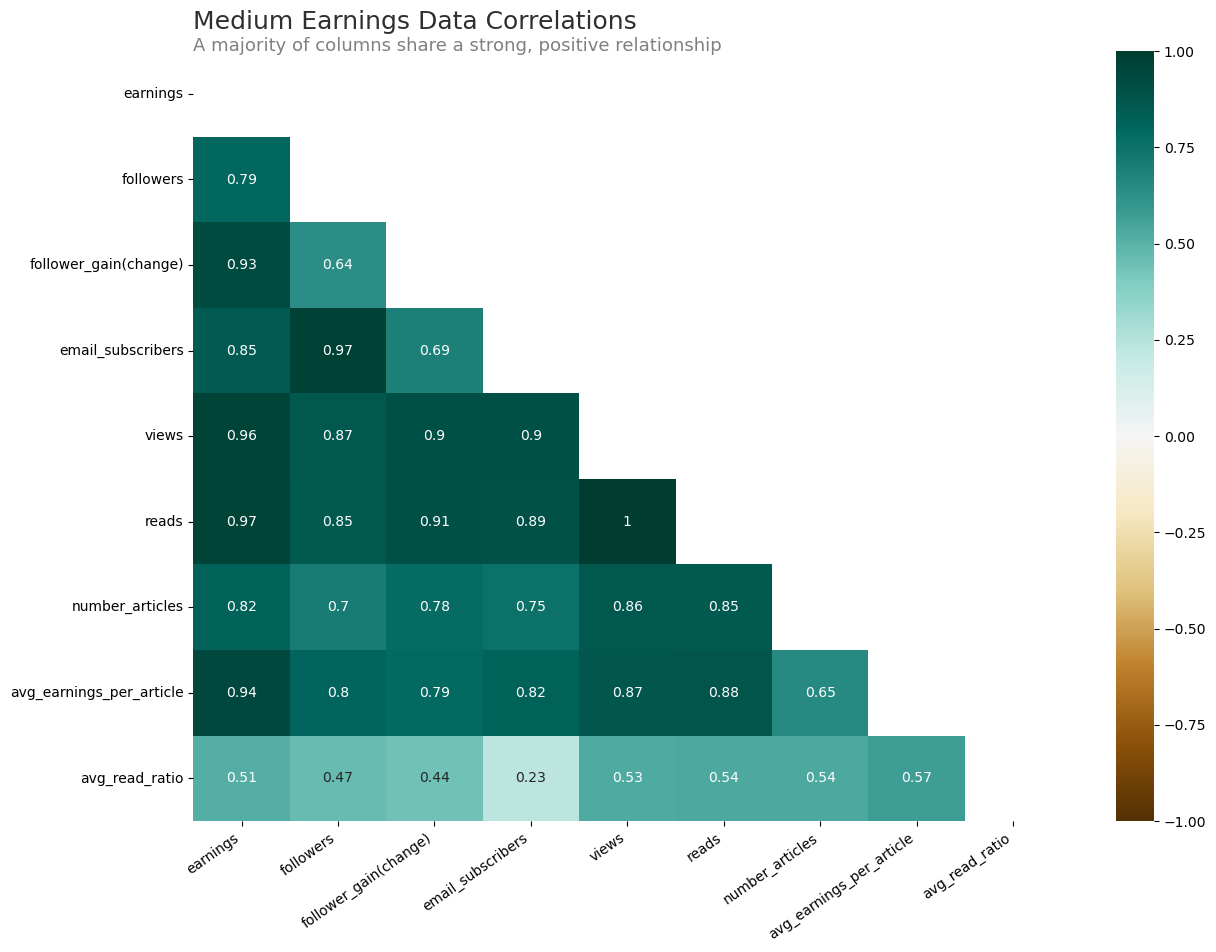

In [13]:

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(dataframe.corr(), dtype=bool))

heatmap = sns.heatmap(dataframe.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title("Medium Earnings Data Correlations", fontdict={'fontsize':18}, pad=16, loc = "left", color = "#302f2f")
plt.text(x = 0, y = 0, s = "A majority of columns share a strong, positive relationship ", size = 13, color = "grey",)
plt.xticks(rotation = 35, ha = "right")
plt.show()



### At first glance:
1. Earnings has the strongest correlation `reads`--Not surprising; nothing really new here. To earn royalties, people have to read your articles.
2. Earnings and average read ration is the lowest (0.51).
3. The number of followers you have has a strong correlation, but one of the weakest correlations after average read ratio.
4. How many people read your articles per month is strongly correlated to the number of articles you publish per month.

### 1.3 Earnings Over Time

* Line plot of earnings from 2023 to the current month
* Highlight key personal events affecting earnings (relationship struggles, major insights, platform trends)

### 1.4 Rolling Change in Earnings

* Calculate month-over-month percentage change
* Rolling average for trend smoothing

In [7]:
### round(dataframe["earnings"].pct_change() * 100, 2)